In [68]:
import pandas as pd
import numpy as np
import seaborn as sb
import datetime
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [69]:
import os

current_dir = os.getcwd()
print(current_dir)

c:\Users\ks885\Documents\aa_research\Modeling\spcm_genx_experiment\figures


In [70]:
plots_path = os.path.join(current_dir, 'plots') + "/"
pdf_path = os.path.join(current_dir, 'pdf_tables') + "/"
latex_path = os.path.join(current_dir, 'latex') + "/"
csv_path = os.path.join(current_dir, 'csv') + "/"
jpg_path = os.path.join(current_dir, 'jpg') + "/"



In [71]:
stacked_bar_path = os.path.join(jpg_path, 'figure_stacked_bar') + "/"
if not os.path.exists(stacked_bar_path):
    os.makedirs(stacked_bar_path)
    print("Directory '%s' created" % stacked_bar_path)

Directory 'c:\Users\ks885\Documents\aa_research\Modeling\spcm_genx_experiment\figures\jpg/figure_stacked_bar/' created


In [72]:
# modeling scaling ModelScalingFactor
ModelScalingFactor = 1000

cem_path = os.path.join(os.path.dirname(current_dir), 'GenX.jl', 'research_systems')
policies_path = os.path.join(os.path.dirname(current_dir), 'SPCM', 'research_systems')

date = datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")

In [73]:
params_names = ['Inv_cost_MW', 'Inv_cost_MWh', 'Fixed_OM_cost_MW', 'Var_OM_cost_out', 
          'Fuel_cost', 'Var_OM_cost_in', 'StartCost', 'Charge_cost', 'EnergyRevenue', 
          'OperatingReserveRevenue', 'OperatingRegulationRevenue']

system_costs = ['Inv_cost_MW', 'Inv_cost_MWh', 'Fixed_OM_cost_MW', 'Var_OM_cost_out', 
        'Fuel_cost', 'Var_OM_cost_in', 'StartCost']

economic_cost_params = system_costs + ['Charge_cost']

economic_revenue_params = ['EnergyRevenue', 'OperatingReserveRevenue', 'OperatingRegulationRevenue']

In [74]:
case_names = [    
              "Thermal_Base",
              "2_Hr_BESS", 
              "2_Hr_BESS_Fuelx2",
              "4_Hr_BESS",
              "4_Hr_BESS_Fuelx2",
              "4_Hr_BESS_Fuelx3",
              "4_Hr_BESS_Fuelx4",
              "6_Hr_BESS",
              # "6_Hr_BESS_Fuelx2",
            #   "8_Hr_BESS",
            #   "8_Hr_BESS_Fuelx2",
            #   "10_Hr_BESS",
            #   "10_Hr_BESS_Fuelx2",
              ]

model_types = [
                'cem',
                'pf',
                'dlac-p',
                'dlac-i',
                'slac',
]

In [75]:
case_name = case_names[0]
model_type = model_types[1]

In [76]:
def plot_profits_stacked_bar_chart(path, economics_scaled, scaled_profit, case_title, resource_names, df_gen_capacity):
    plot = economics_scaled.plot(x='Resource', kind='bar', stacked=True)
    for i in range(len(resource_names)):
        plot.plot([i-0.5,i+0.5], [scaled_profit[i],scaled_profit[i]], color='r', linestyle='--')
        
    plot.plot([], [], color='r', linestyle='--', label='Profit Margin')
    plot.legend(loc='upper left', prop={'size': 8})
    # cem_plot.set_xticklabels(gen_print_names, rotation=0)
    plot.xaxis.set_ticks([])
    plot.set_xlabel('')
    plot.set_title(case_title + ' - Operational Costs and Revenues')
    plot.set_ylabel('Amount ($ Million)')
    plot.figure.set_size_inches(10,6)

    col_labels = df_gen_capacity['Resource']
    row_labels = ['Capacity (GW)']

    rounded_gen_capacity = df_gen_capacity['Capacity (GW)'].round().astype(int)
    table_data = [rounded_gen_capacity.tolist()]

    the_table = plt.table(cellText=table_data,
                        rowLabels=row_labels,
                        colLabels=col_labels,
                        loc='bottom',
                        cellLoc='center',
                        colColours=["lightblue"]*len(col_labels))
    
    # print to jpg
    plt.savefig(path + case_title + '_stacked_bar_chart.jpg', bbox_inches='tight')

Case Name: Thermal_Base

Case Name: 2_Hr_BESS

Case Name: 2_Hr_BESS_Fuelx2

Case Name: 4_Hr_BESS

Case Name: 4_Hr_BESS_Fuelx2



c:\Users\ks885\AppData\Local\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\core.py:509: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


Case Name: 4_Hr_BESS_Fuelx3

Case Name: 4_Hr_BESS_Fuelx4

Case Name: 6_Hr_BESS



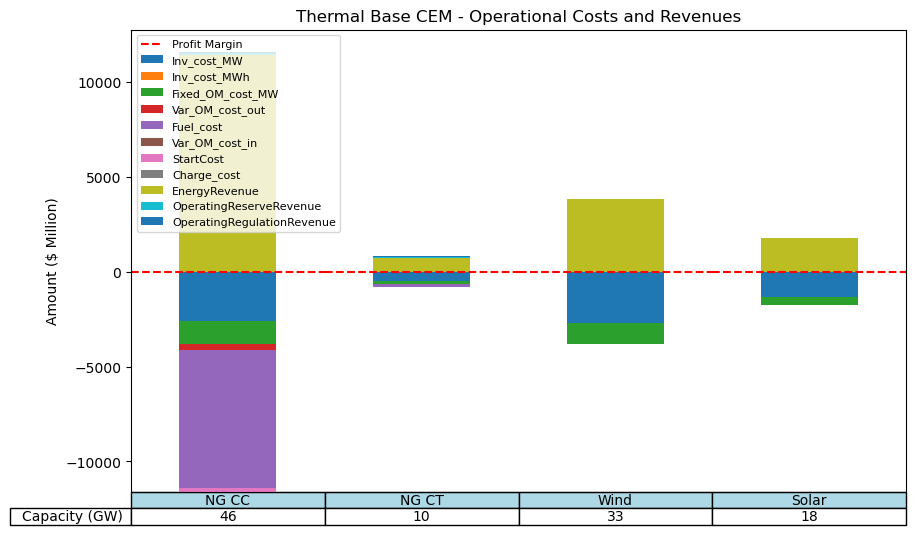

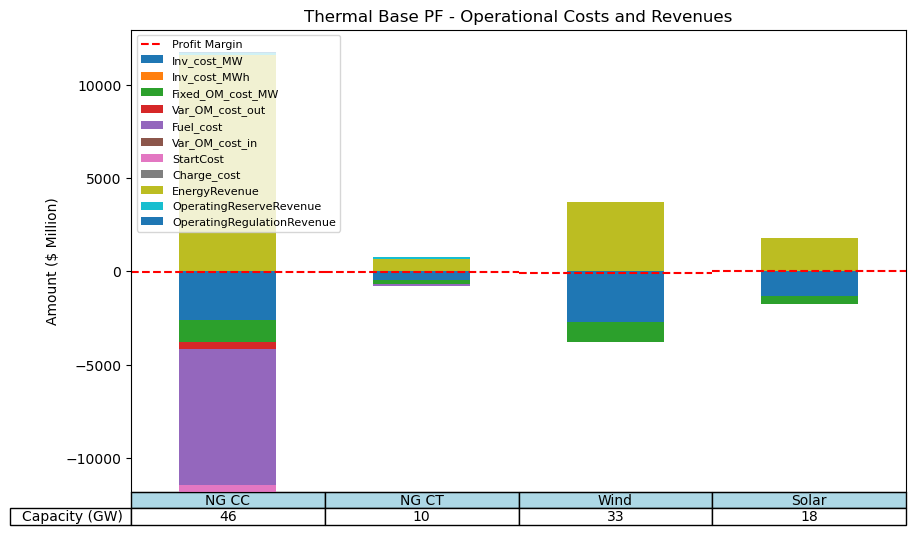

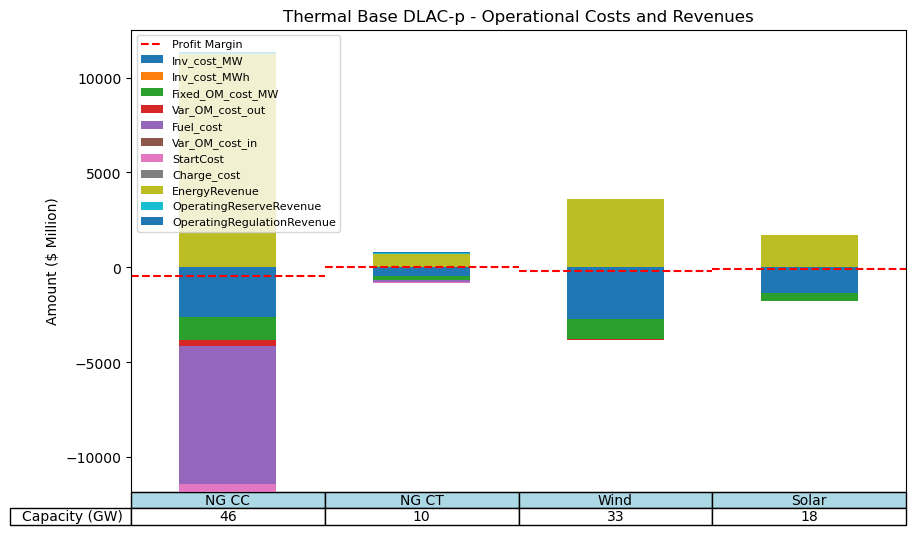

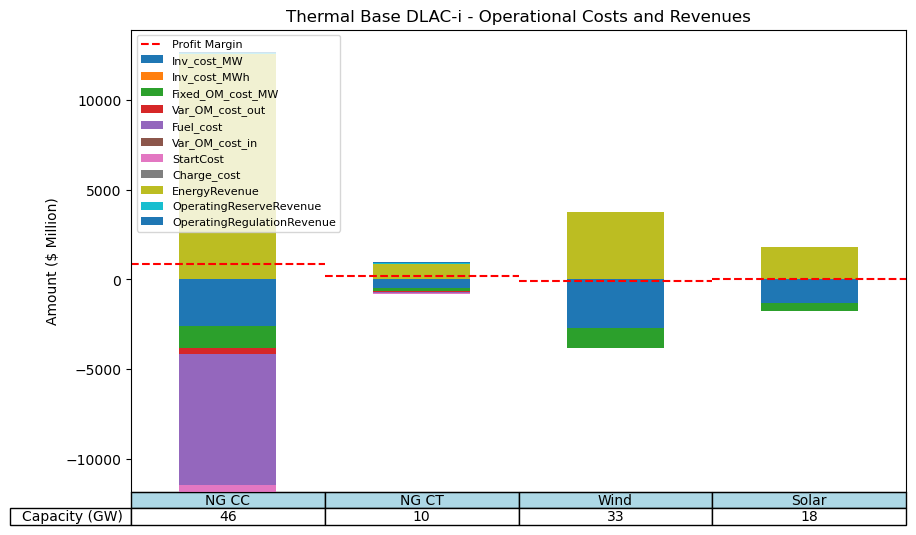

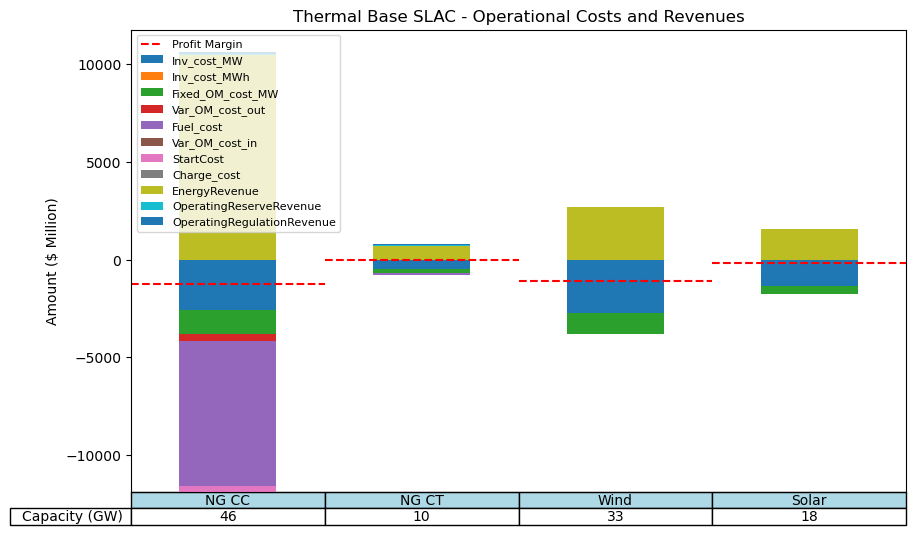

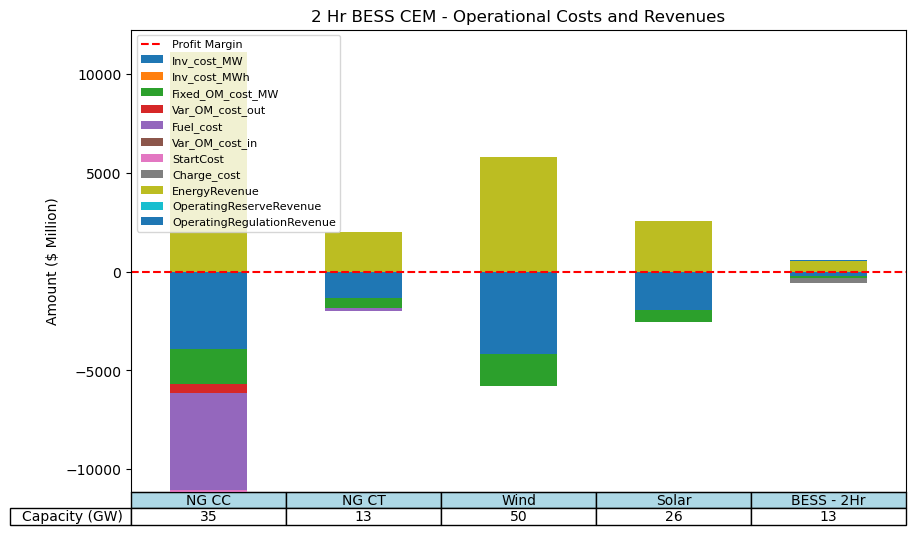

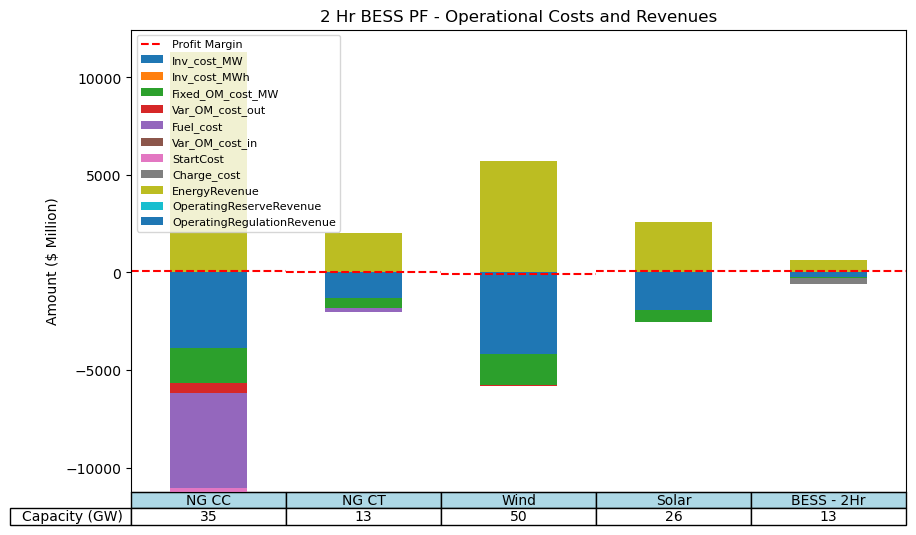

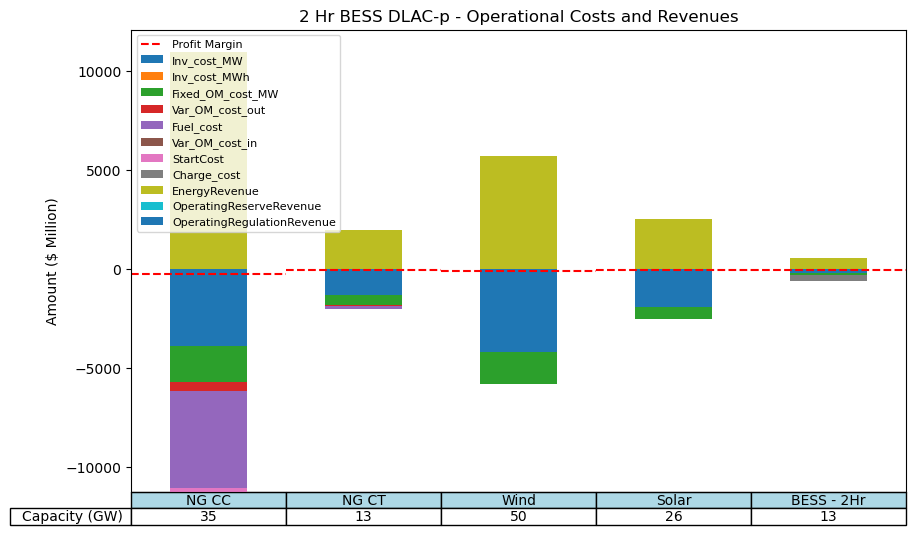

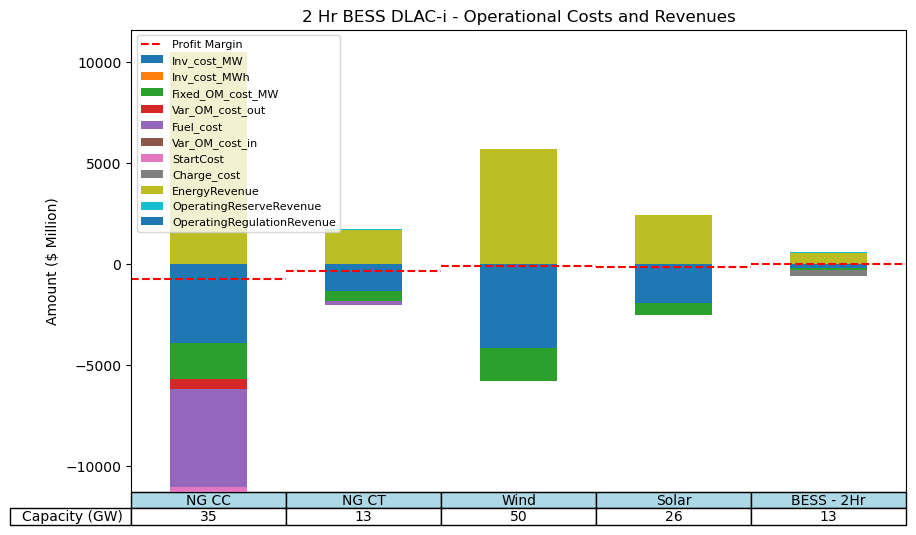

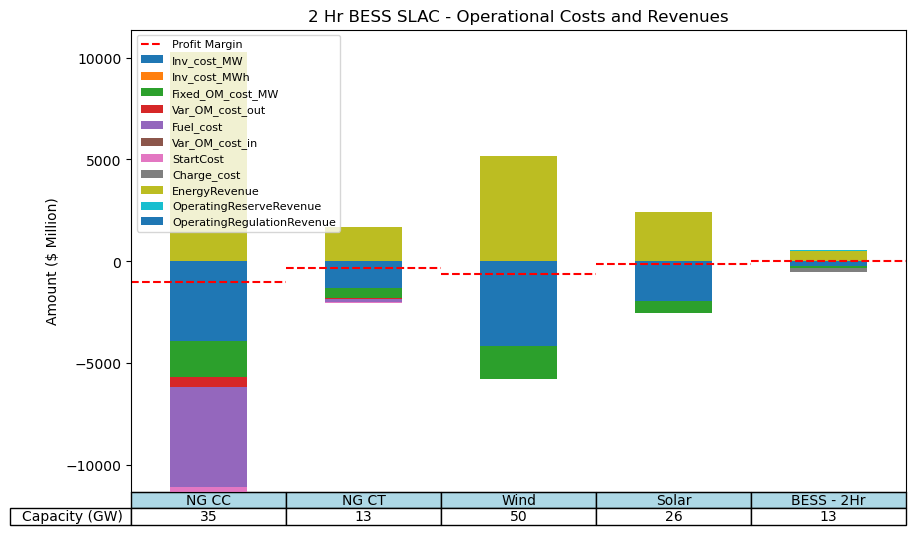

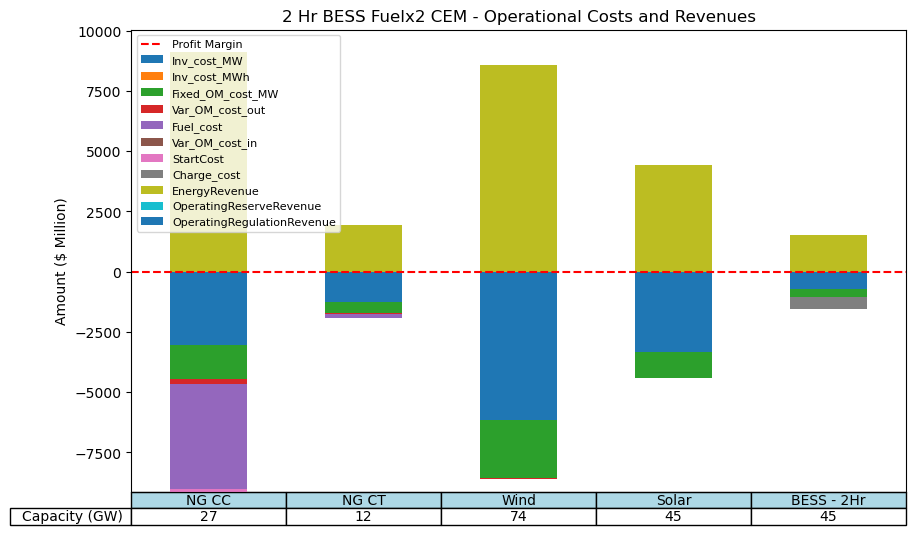

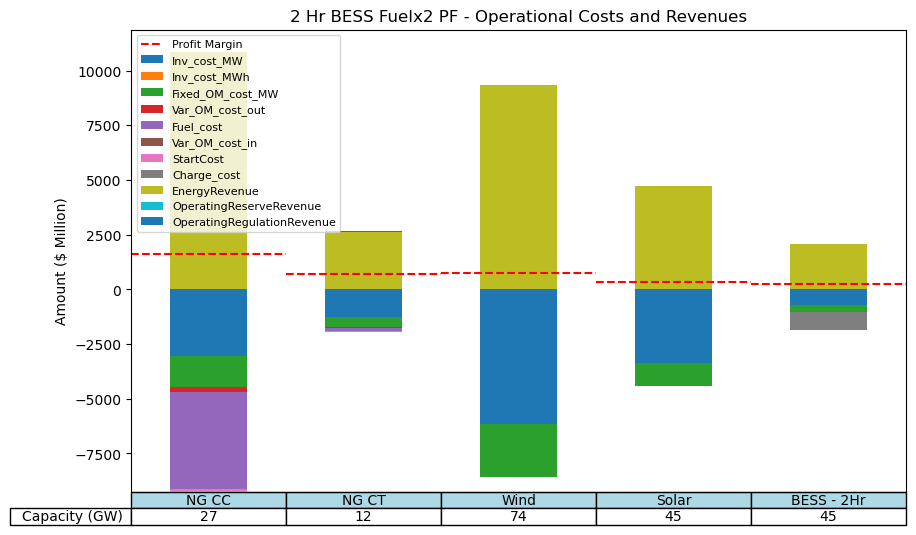

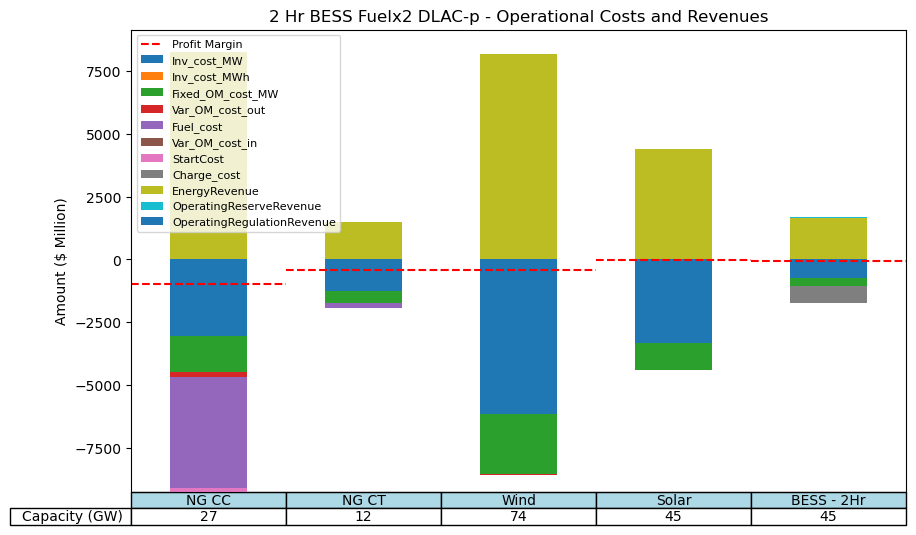

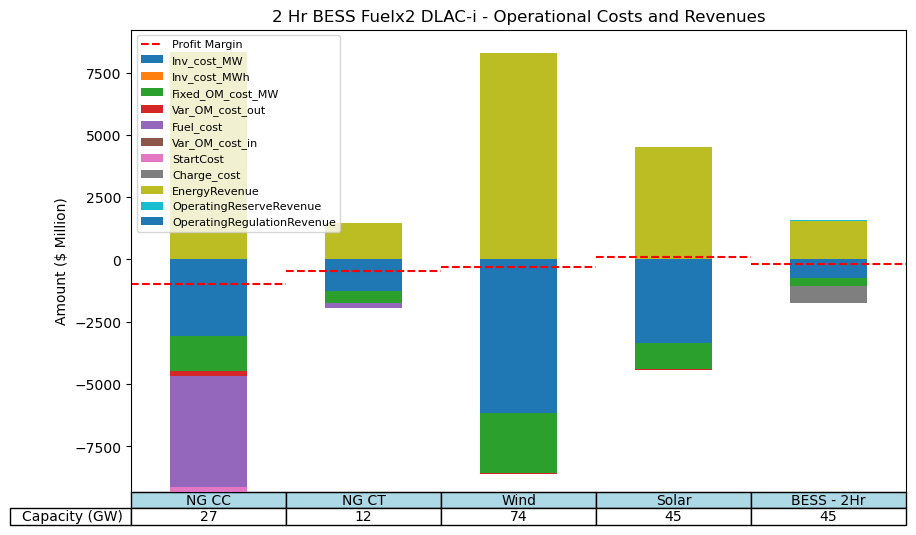

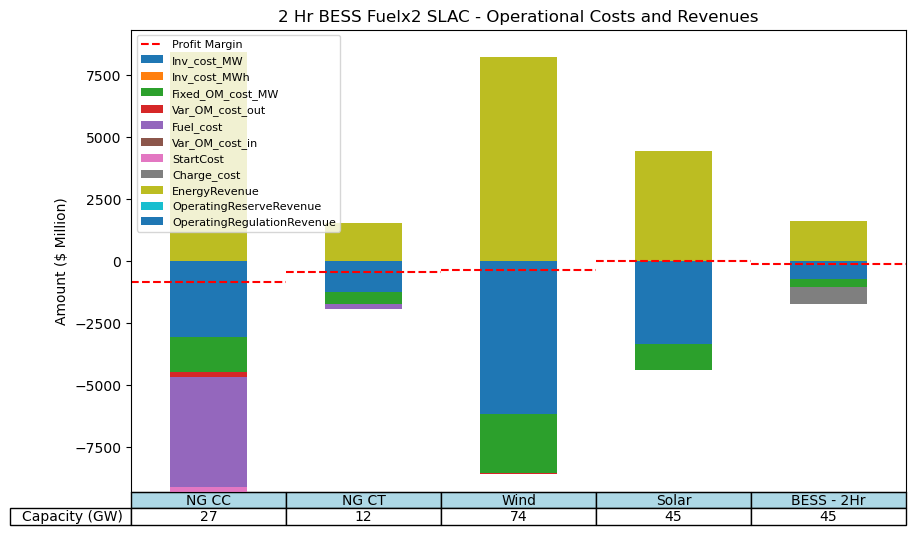

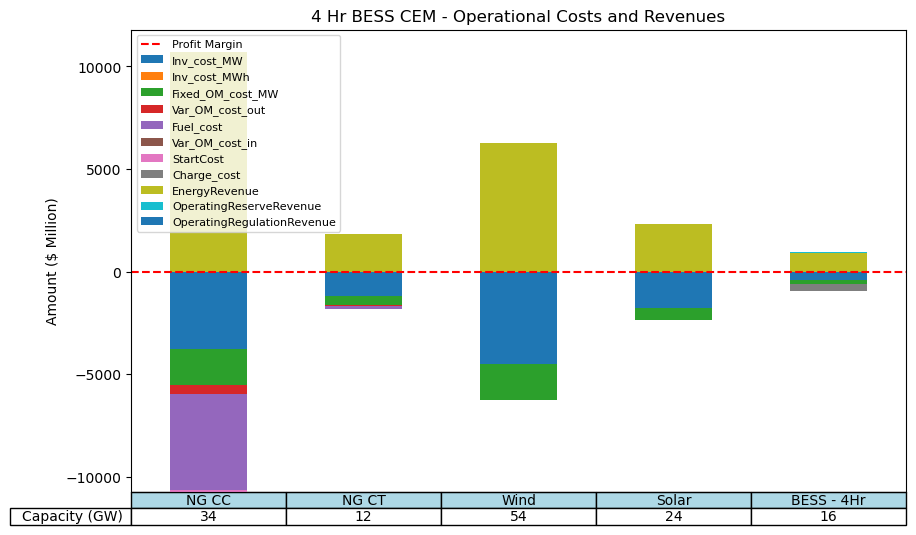

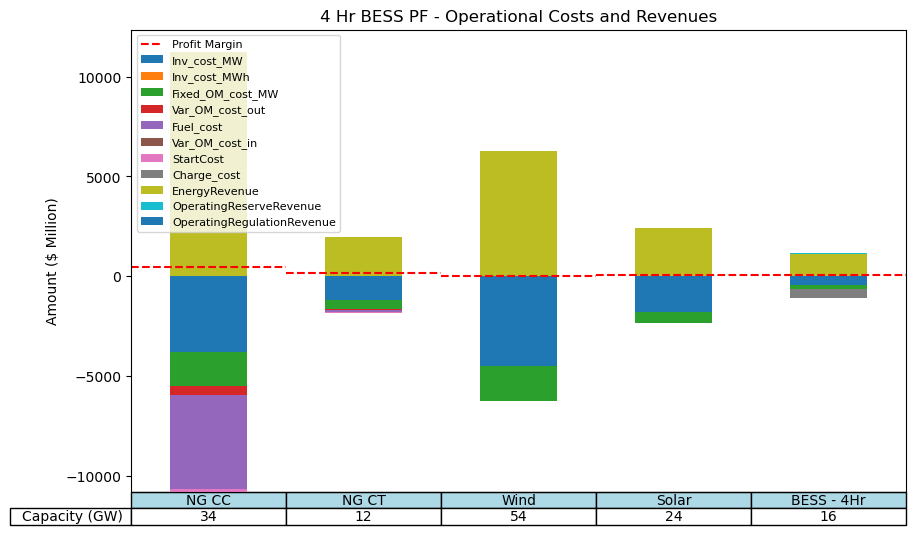

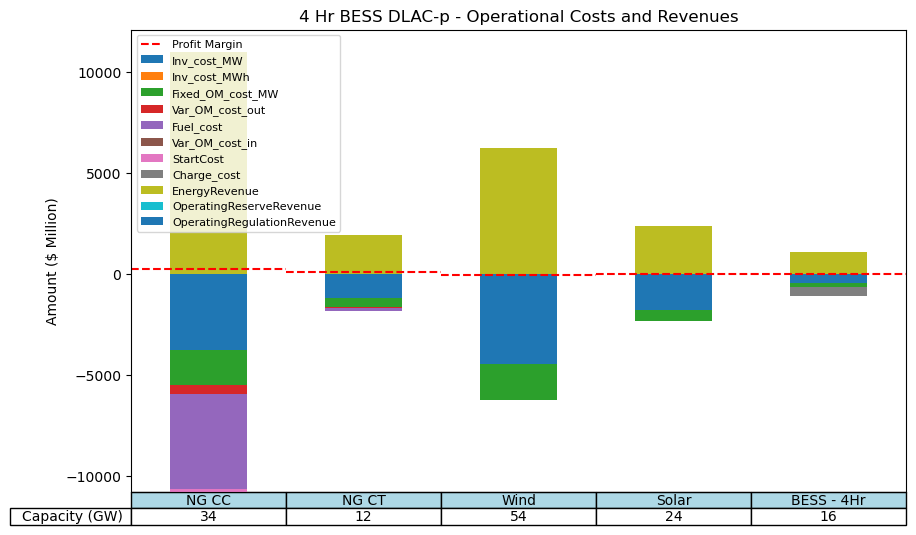

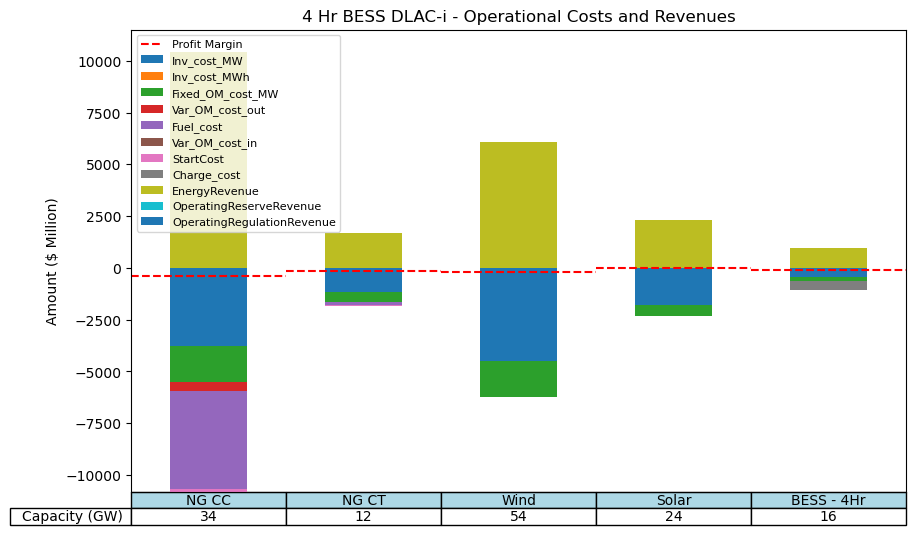

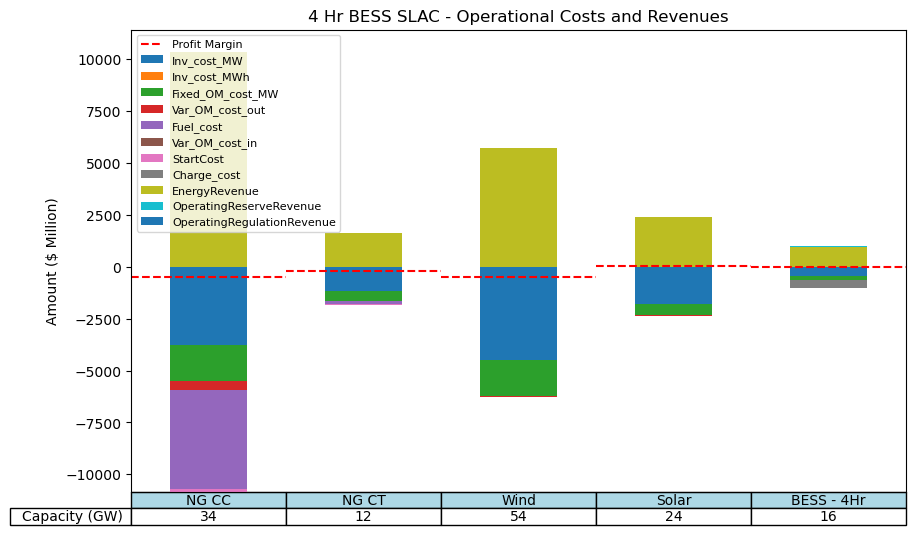

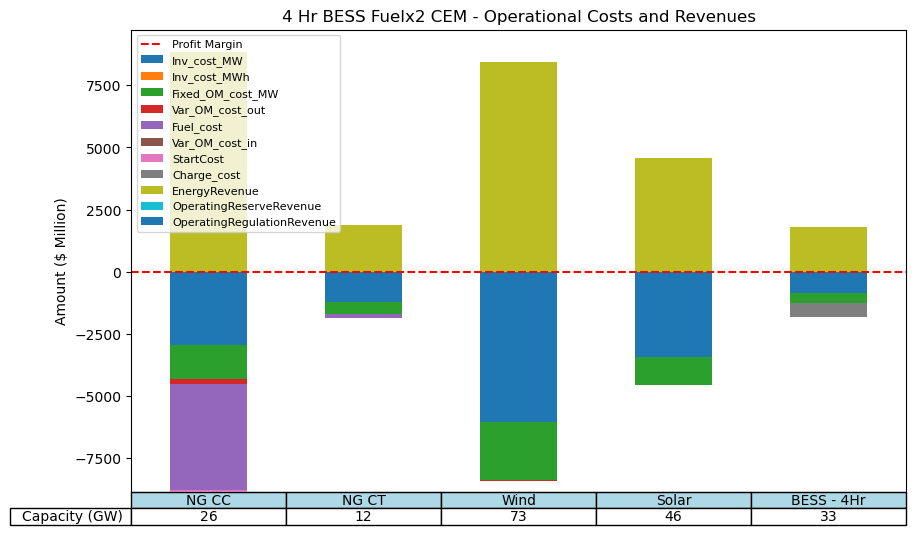

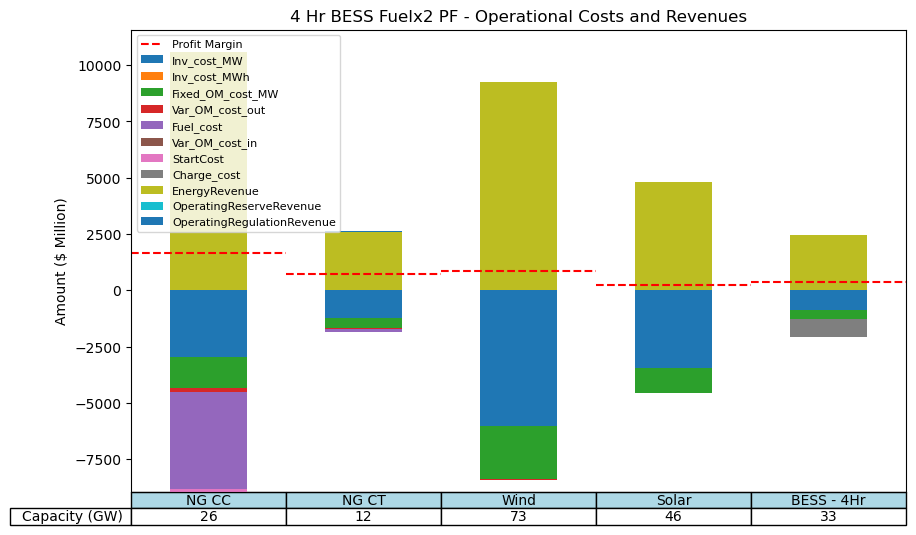

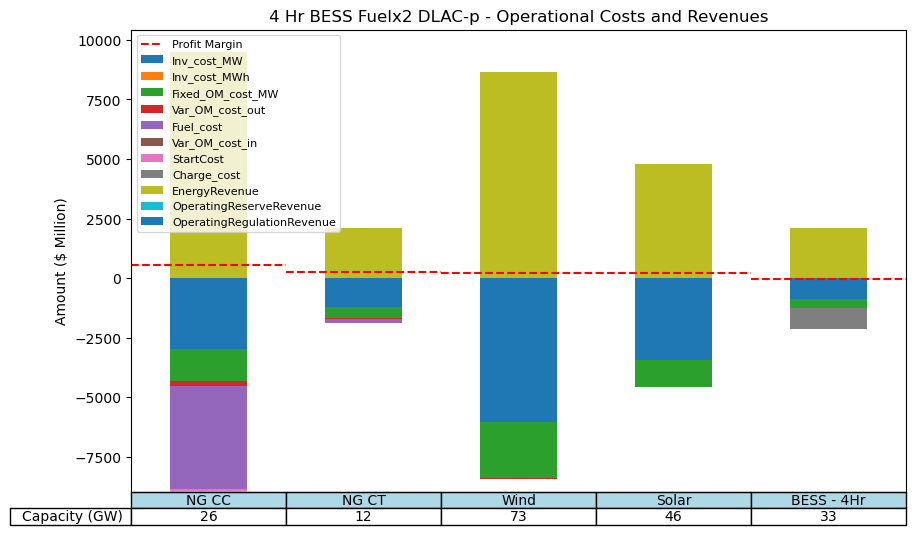

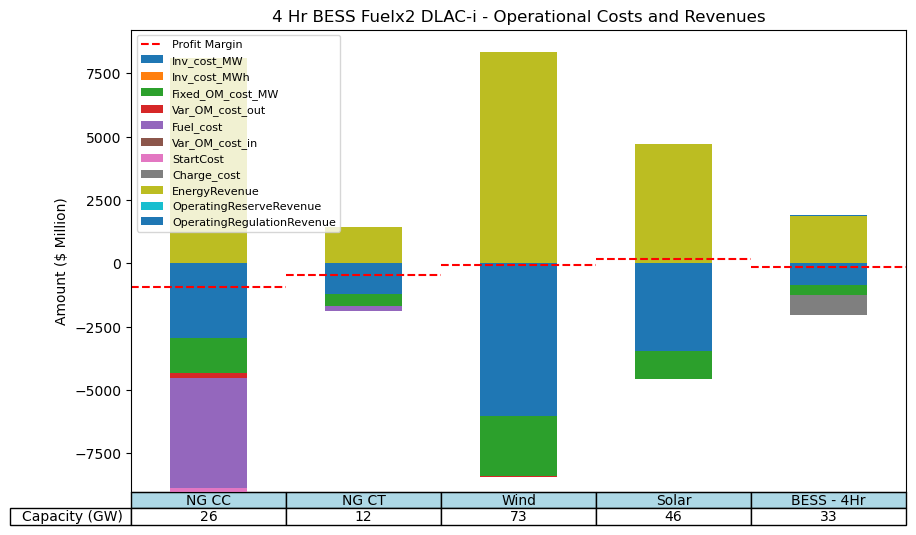

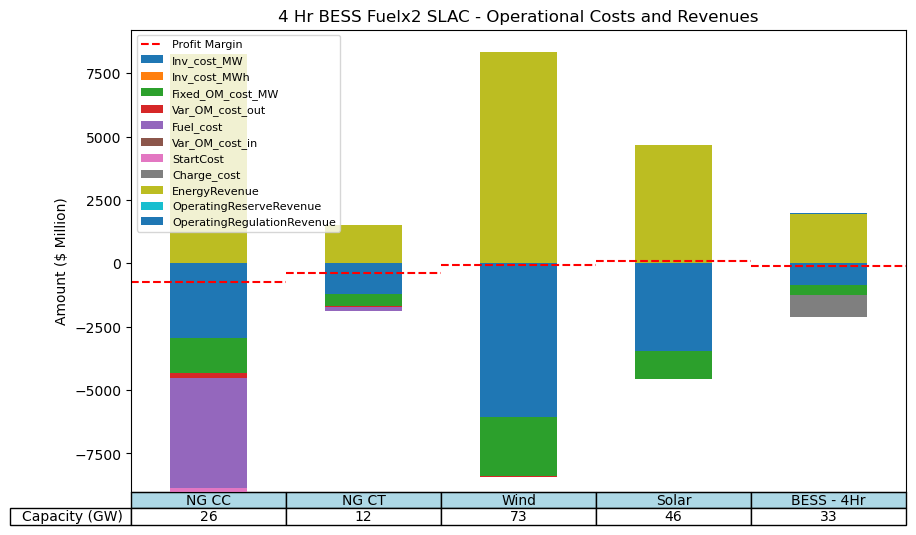

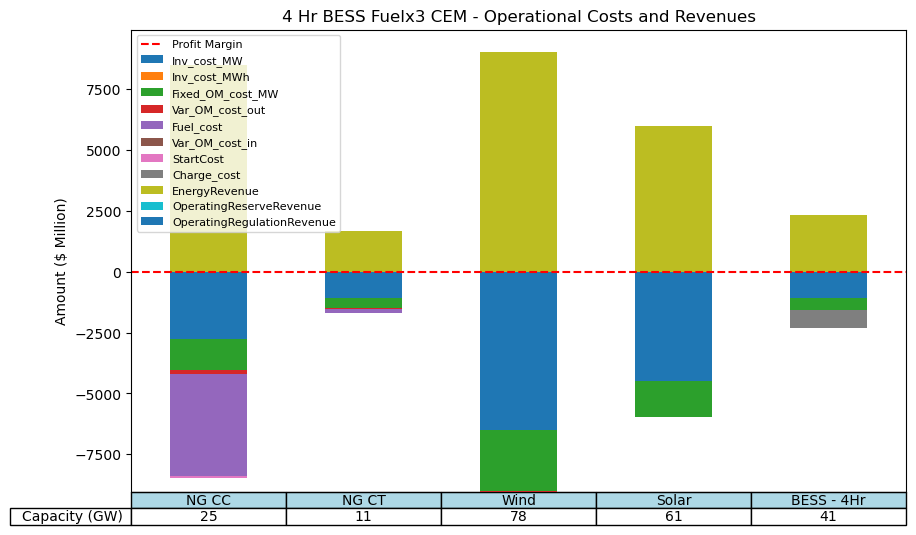

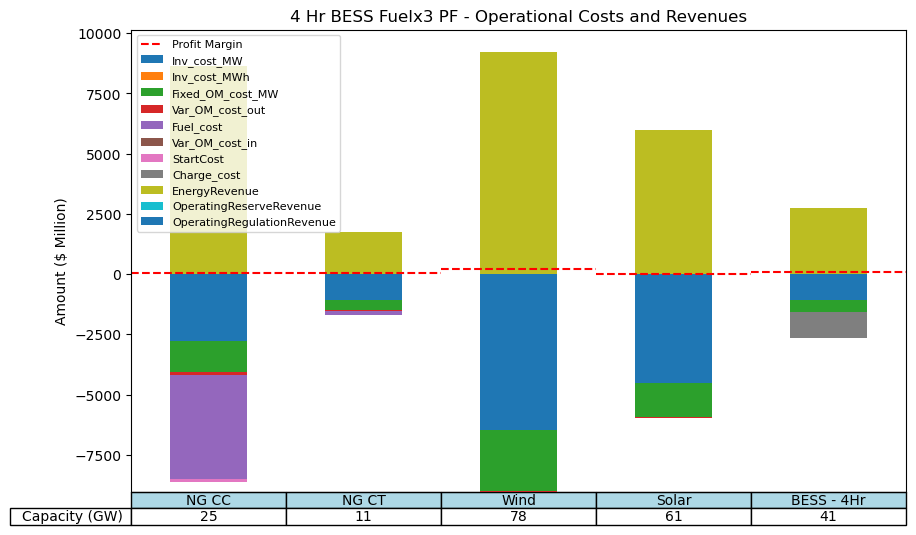

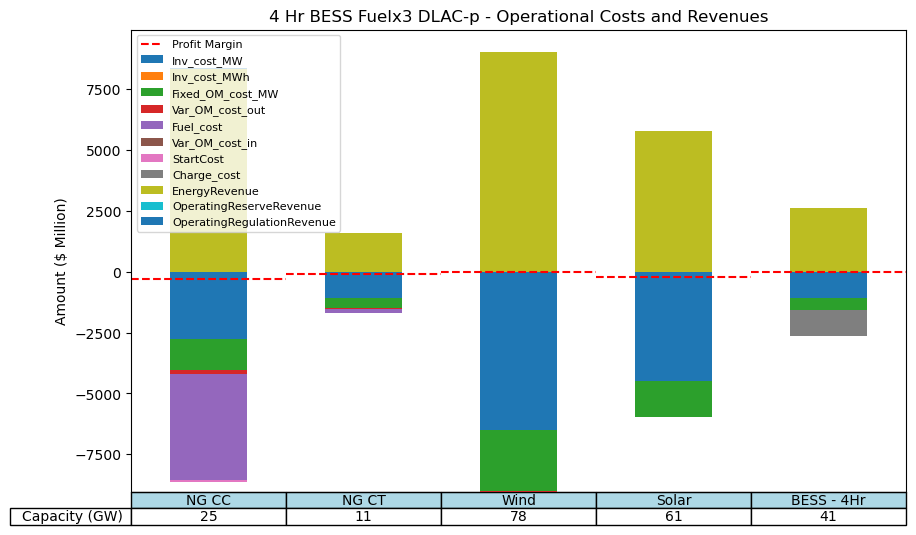

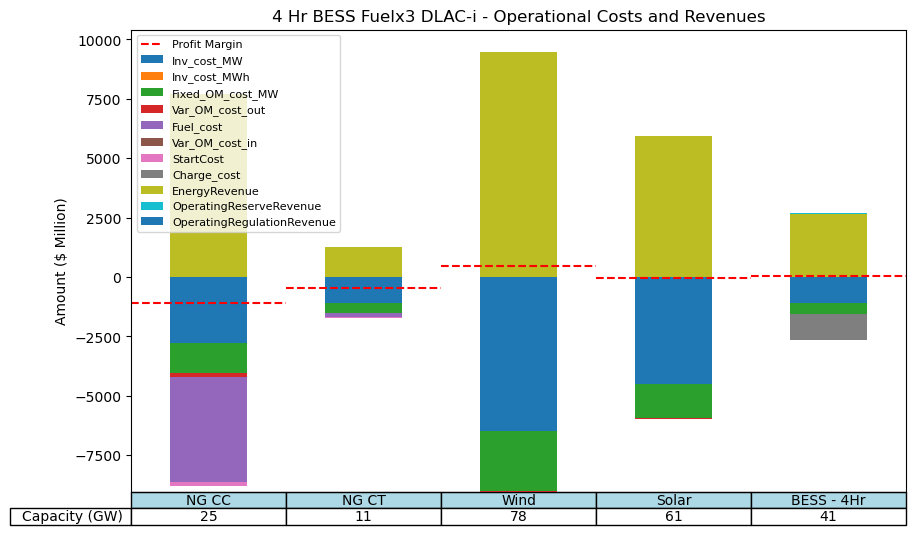

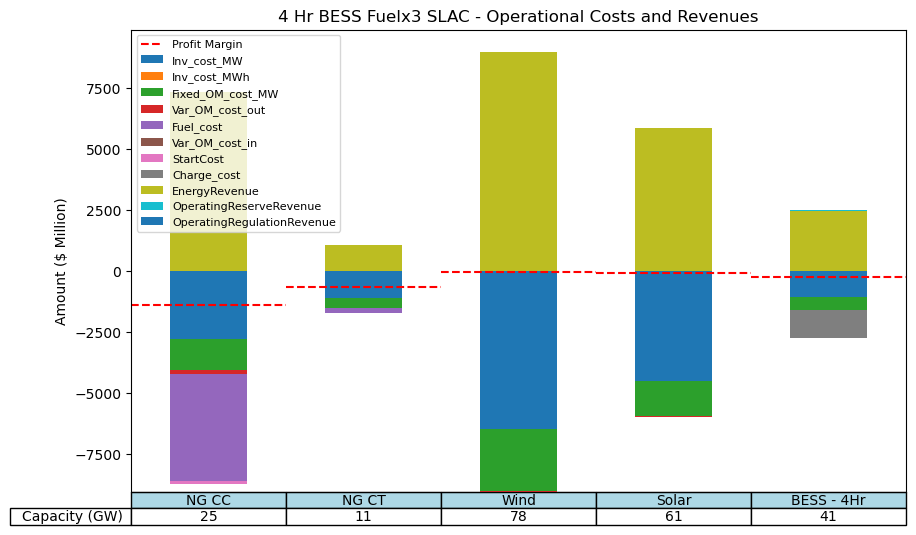

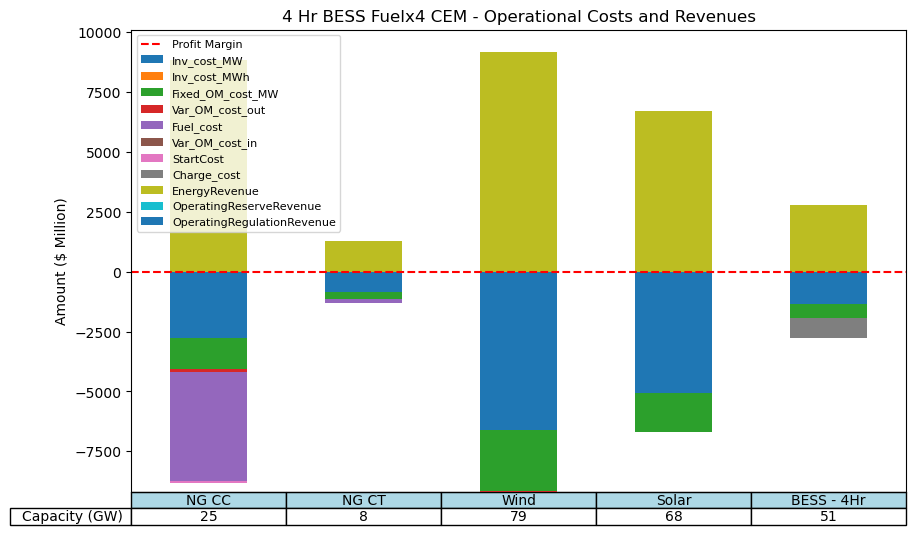

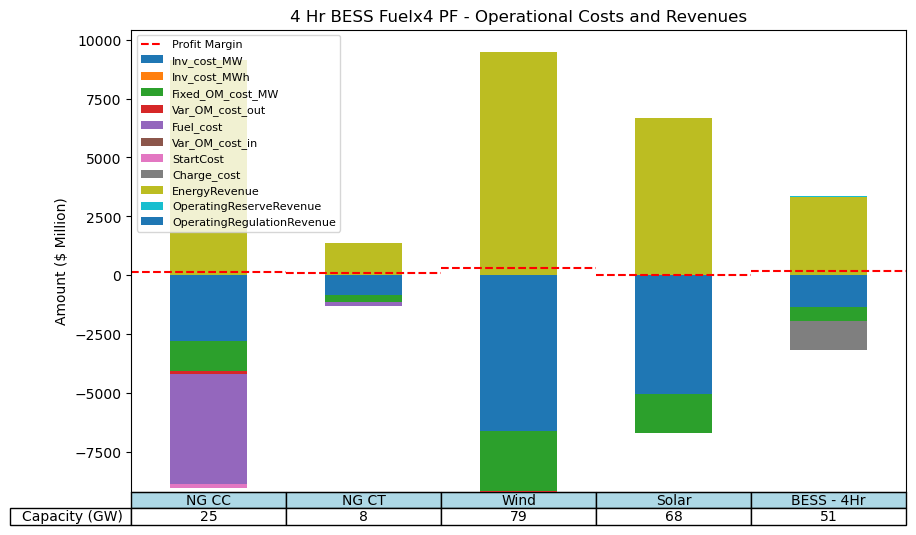

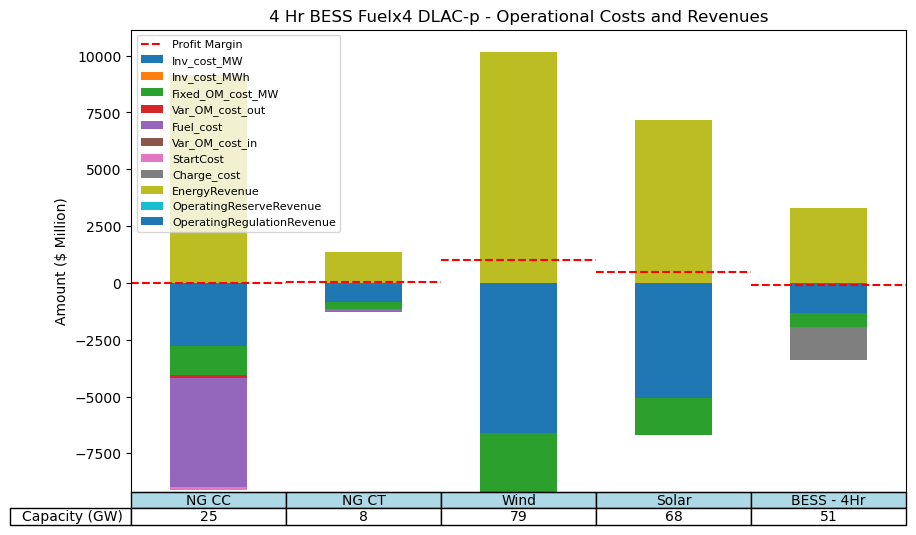

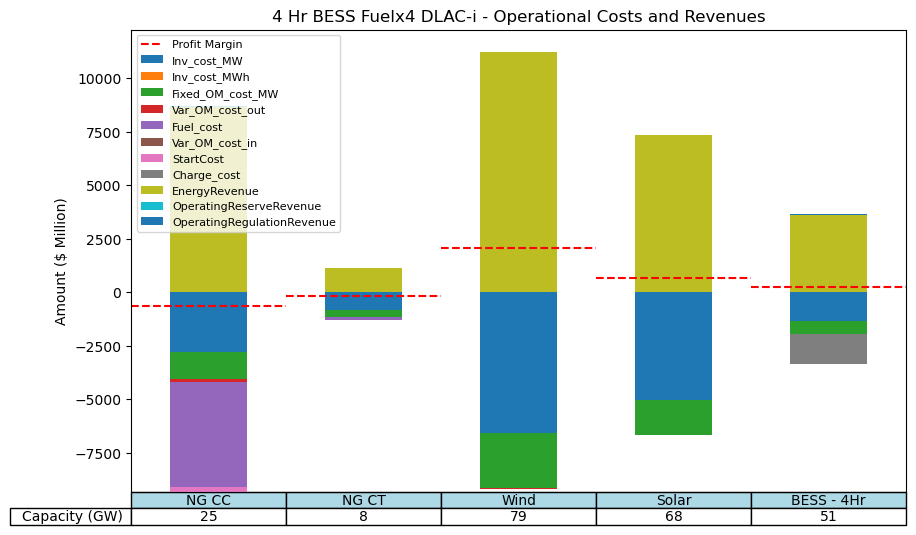

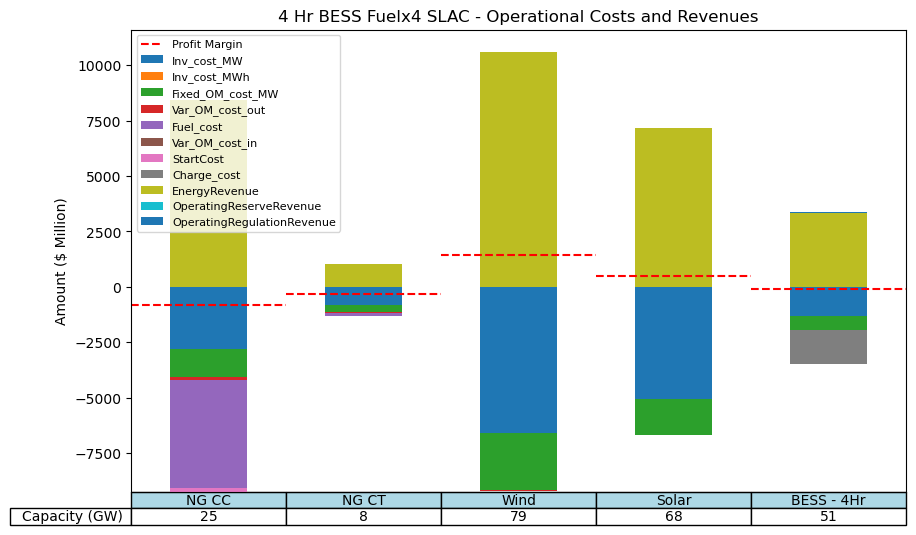

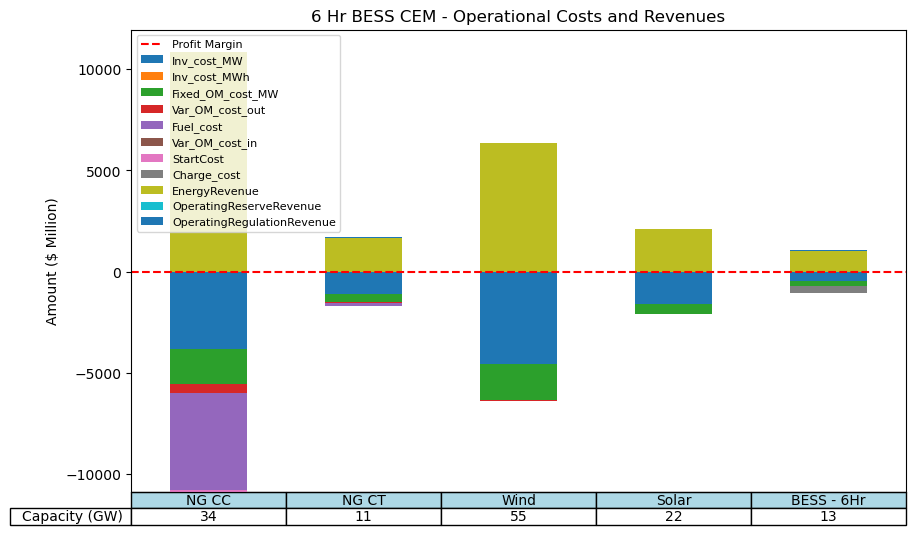

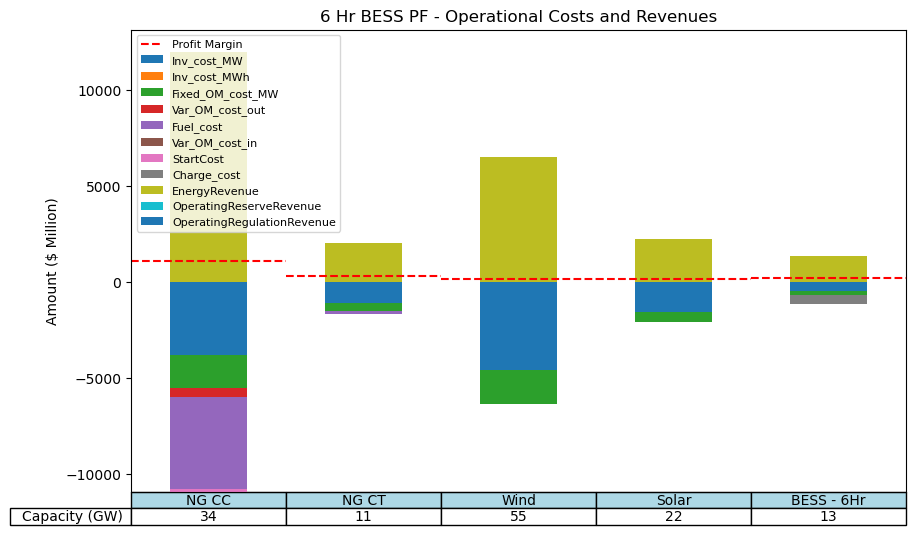

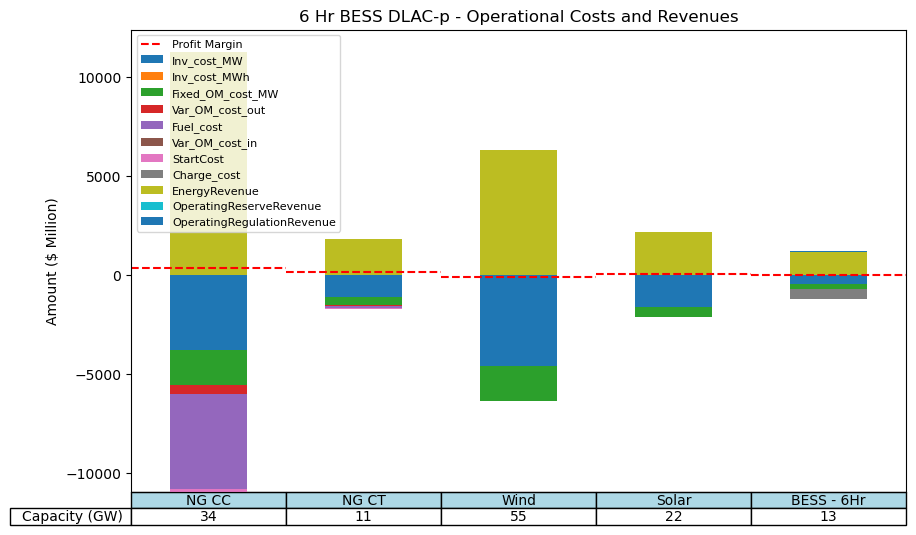

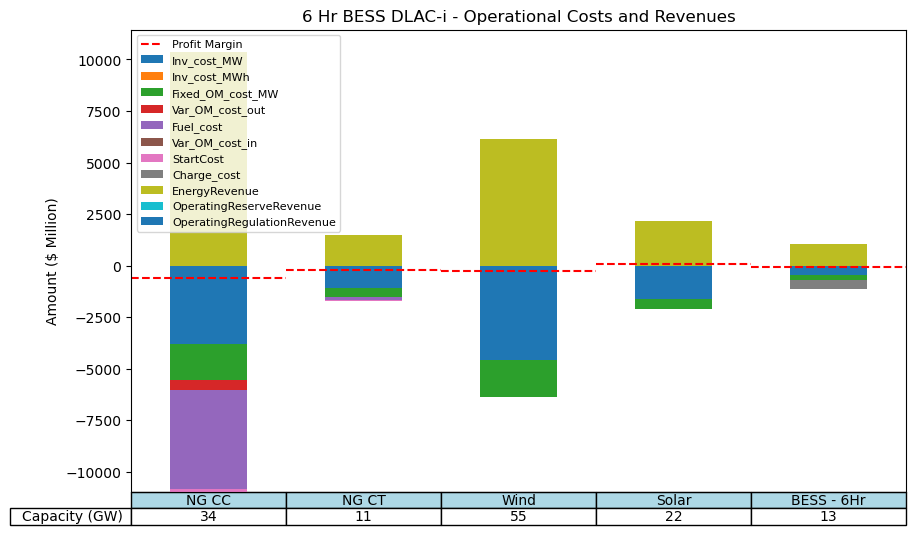

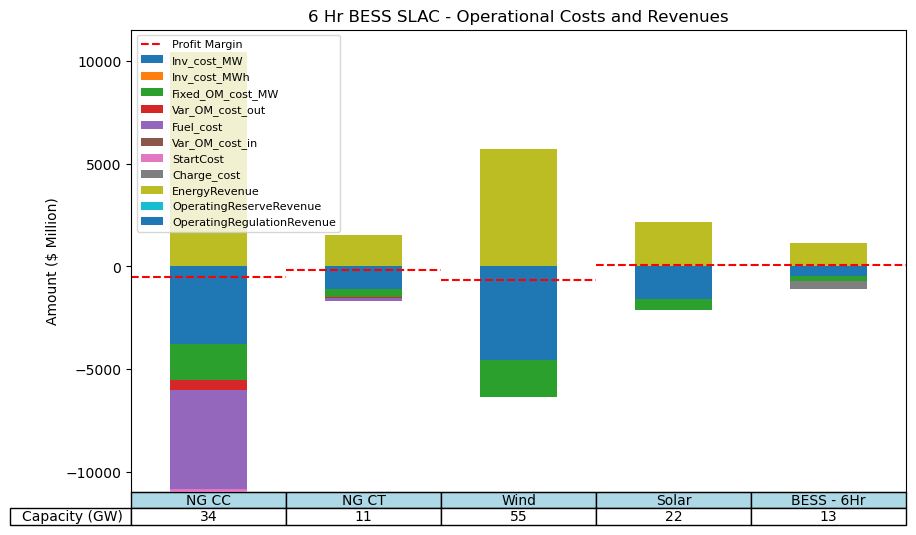

In [77]:
for case_name in case_names:

    print('Case Name: ' + case_name + '\n')

    # load generator characteristics from resources folder
    thermal_dfGen = pd.read_csv(policies_path + '\\' + case_name + '\\resources' + '\\Thermal.csv')
    vre_dfGen = pd.read_csv(policies_path + '\\' + case_name + '\\resources' + '\\Vre.csv')
    storage_dfGen = pd.read_csv(policies_path + '\\' + case_name + '\\resources' + '\\Storage.csv')

    # combine all resources to dfGen
    dfGen = pd.concat([thermal_dfGen, vre_dfGen, storage_dfGen], ignore_index=True)
    gen_capacity_gw = dfGen['Existing_Cap_MW'] / ModelScalingFactor

    resource_list = dfGen['Resource']
    gen_print_names = resource_list.copy()

    for i in range(len(resource_list)):
        gen_print_names[i] = gen_print_names[i].replace("Coal-new", "Coal")
        gen_print_names[i] = gen_print_names[i].replace("NG Combustion Turbine (F-Frame)", "NG CT")
        gen_print_names[i] = gen_print_names[i].replace("NG 2-on-1 Combined Cycle (F-Frame)", "NG CC")
        gen_print_names[i] = gen_print_names[i].replace("Utility PV - Class 1", "Solar")
        gen_print_names[i] = gen_print_names[i].replace("Land-Based Wind - Class 1 - Technology 1", "Wind")
        gen_print_names[i] = gen_print_names[i].replace("Utility-Scale Battery Storage", "BESS")

    df_gen_capacity = pd.DataFrame({'Resource': gen_print_names, 'Capacity (GW)': round(gen_capacity_gw,1)})

    cem_results_path = cem_path + '\\' + case_name + '\\' + 'results\\'
    pf_results_path = policies_path + '\\' + case_name + '\\' + 'results_pf\\'
    dlac_results_path = policies_path + '\\' + case_name + '\\' + 'results_dlac-p\\'
    dlac_imperfect_results_path = policies_path + '\\' + case_name + '\\' + 'results_dlac-i\\'
    slac_results_path = policies_path + '\\' + case_name + '\\' + 'results_slac\\'

    cem_raw = pd.read_csv(cem_results_path + 'NetRevenue.csv')
    pf_raw = pd.read_csv(pf_results_path + 'NetRevenue.csv')
    dlac_raw = pd.read_csv(dlac_results_path + 'NetRevenue.csv')
    dlac_imperfect_raw = pd.read_csv(dlac_imperfect_results_path + 'NetRevenue.csv')
    slac_raw = pd.read_csv(slac_results_path + 'NetRevenue.csv')

    ### get cem dataframe of only non-trivial resources
    cem_raw_upd = cem_raw[cem_raw['Resource'].isin(resource_list)]
    # make sure the order of the resources is the same in dfGen and cem_raw_upd
    cem_raw_upd = cem_raw_upd.set_index('Resource').reindex(resource_list).reset_index()


    cem_economics = cem_raw_upd[economic_cost_params + economic_revenue_params]
    pf_economics = pf_raw[economic_cost_params + economic_revenue_params]
    dlac_economics = dlac_raw[economic_cost_params + economic_revenue_params]
    dlac_imperfect_economics = dlac_imperfect_raw[economic_cost_params + economic_revenue_params]
    slac_economics = slac_raw[economic_cost_params + economic_revenue_params]

    cem_economics_copy = cem_economics.copy()
    pf_economics_copy = pf_economics.copy()
    dlac_economics_copy = dlac_economics.copy()
    dlac_imperfect_economics_copy = dlac_imperfect_economics.copy()
    slac_economics_copy = slac_economics.copy()

    cem_economics_copy[economic_cost_params] = cem_economics_copy[economic_cost_params] * -1
    pf_economics_copy[economic_cost_params] = pf_economics_copy[economic_cost_params] * -1
    dlac_economics_copy[economic_cost_params] = dlac_economics_copy[economic_cost_params] * -1
    dlac_imperfect_economics_copy[economic_cost_params] = dlac_imperfect_economics_copy[economic_cost_params] * -1
    slac_economics_copy[economic_cost_params] = slac_economics_copy[economic_cost_params] * -1

    cem_profit = cem_economics_copy.sum(axis=1)
    pf_profit = pf_economics_copy.sum(axis=1)
    dlac_profit = dlac_economics_copy.sum(axis=1)
    dlac_imperfect_profit = dlac_imperfect_economics_copy.sum(axis=1)
    slac_profit = slac_economics_copy.sum(axis=1)

    cem_economics_scaled = cem_economics_copy / ModelScalingFactor**2
    pf_economics_scaled = pf_economics_copy / ModelScalingFactor**2
    dlac_economics_scaled = dlac_economics_copy / ModelScalingFactor**2
    dlac_imperfect_economics_scaled = dlac_imperfect_economics_copy / ModelScalingFactor**2
    slac_economics_scaled = slac_economics_copy / ModelScalingFactor**2

    cem_scaled_profit = cem_economics_scaled.sum(axis=1)
    pf_scaled_profit = pf_economics_scaled.sum(axis=1)
    dlac_scaled_profit = dlac_economics_scaled.sum(axis=1)
    dlac_imperfect_scaled_profit = dlac_imperfect_economics_scaled.sum(axis=1)
    slac_scaled_profit = slac_economics_scaled.sum(axis=1)


    cem_economics_scaled['Resource'] = gen_print_names
    pf_economics_scaled['Resource'] = gen_print_names
    dlac_economics_scaled['Resource'] = gen_print_names
    dlac_imperfect_economics_scaled['Resource'] = gen_print_names
    slac_economics_scaled['Resource'] = gen_print_names

    # case title
    print_case_name = case_name.replace("_", " ")
    # plot and print to jpg
    # plot cem
    plot_profits_stacked_bar_chart(stacked_bar_path, cem_economics_scaled, cem_scaled_profit, print_case_name + ' CEM', gen_print_names, df_gen_capacity)
    # plot pf
    plot_profits_stacked_bar_chart(stacked_bar_path, pf_economics_scaled, pf_scaled_profit, print_case_name + ' PF', gen_print_names, df_gen_capacity)
    # plot dlac
    plot_profits_stacked_bar_chart(stacked_bar_path, dlac_economics_scaled, dlac_scaled_profit, print_case_name + ' DLAC-p', gen_print_names, df_gen_capacity)
    # plot dlac imperfect
    plot_profits_stacked_bar_chart(stacked_bar_path, dlac_imperfect_economics_scaled, dlac_imperfect_scaled_profit, print_case_name + ' DLAC-i', gen_print_names, df_gen_capacity)
    # plot slac
    plot_profits_stacked_bar_chart(stacked_bar_path, slac_economics_scaled, slac_scaled_profit, print_case_name + ' SLAC', gen_print_names, df_gen_capacity)

In [78]:
dlac_economics_scaled

,Inv_cost_MW,Inv_cost_MWh,Fixed_OM_cost_MW,Var_OM_cost_out,Fuel_cost,Var_OM_cost_in,StartCost,Charge_cost,EnergyRevenue,OperatingReserveRevenue,OperatingRegulationRevenue,Resource
0,-3806.539612,-0.0,-1751.880607,-464.699475,-4796.418117,-0.0,-127.448755,-0.000000,11285.211588,0.670486,0.869214,NG CC
1,-1093.003343,-0.0,-422.999216,-25.788017,-144.427760,-0.0,-11.064918,-0.000000,1836.572479,0.323125,1.218163,NG CT
2,-4576.614865,-0.0,-1782.693340,-18.304985,-0.000000,-0.0,-0.000000,-0.000000,6293.900324,0.000000,0.000000,Wind
3,-1593.763230,-0.0,-510.921590,-5.024833,-0.000000,-0.0,-0.000000,-0.000000,2160.552938,0.000000,0.000000,Solar
4,-476.170962,-0.0,-221.514066,-0.000000,-0.000000,-0.0,-0.000000,-496.856261,1184.148786,3.463813,4.999364,BESS - 6Hr
